In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

In [2]:
# Settings for displaying floats
pd.set_option('display.float_format', '{:,.2f}'.format)

In [3]:
df = pd.read_csv("../data/cleaned_data.csv")
df.head()

,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Wind-speed,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres
0,2014,12,29,AT,Graz,47.07,15.45,"269,997.00",0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2014,12,29,AT,Innsbruck,47.26,11.39,"124,579.00",0.10,25.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2014,12,29,AT,Linz,48.31,14.29,"193,814.00",0.10,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2014,12,29,AT,Salzburg,47.80,13.04,"146,631.00",0.10,21.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2014,12,29,AT,Vienna,48.21,16.37,NaN,0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df["Date"] = pd.to_datetime(df[["Year", "Month", "Day"]])
df


,Year,Month,Day,Country,City,Latitude,Longitude,Population,Co,No2,...,Dew,Humidity,Tavg,Tmin,Tmax,Prcp,Wdir,Wspd,Pres,Date
0,2014,12,29,AT,Graz,47.07,15.45,"269,997.00",0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-29
1,2014,12,29,AT,Innsbruck,47.26,11.39,"124,579.00",0.10,25.60,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-29
2,2014,12,29,AT,Linz,48.31,14.29,"193,814.00",0.10,14.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-29
3,2014,12,29,AT,Salzburg,47.80,13.04,"146,631.00",0.10,21.10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-29
4,2014,12,29,AT,Vienna,48.21,16.37,NaN,0.10,9.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-12-29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693853,2025,3,3,ZA,Cape town,-33.93,18.42,NaN,NaN,3.90,...,NaN,69.70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-03
1693854,2025,3,3,ZA,Durban,-29.86,31.03,NaN,NaN,NaN,...,20.00,88.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-03
1693855,2025,3,3,ZA,Port elizabeth,-33.96,25.61,NaN,NaN,4.20,...,18.00,88.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-03
1693856,2025,3,3,ZA,Vereeniging,-26.67,27.93,NaN,NaN,1.80,...,NaN,95.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-03-03


In [ ]:
df_ashkelon_co = df[(df["City"] == "Ashkelon")][["Date", "Co"]]
df_ashkelon_co

,Date,Co
221,2014-12-29,NaN
650,2014-12-30,NaN
1074,2014-12-31,NaN
1506,2015-01-01,NaN
1915,2015-01-02,NaN
...,...,...
1691392,2025-02-27,NaN
1691953,2025-02-28,NaN
1692505,2025-03-01,NaN
1693047,2025-03-02,NaN


In [8]:
df_ashkelon_co.isna().sum()

Date       0
Co      2682
dtype: int64

In [11]:
anzahl_nicht_nan = df_ashkelon_co["Co"].notna().sum()
anzahl_nicht_nan

np.int64(36)

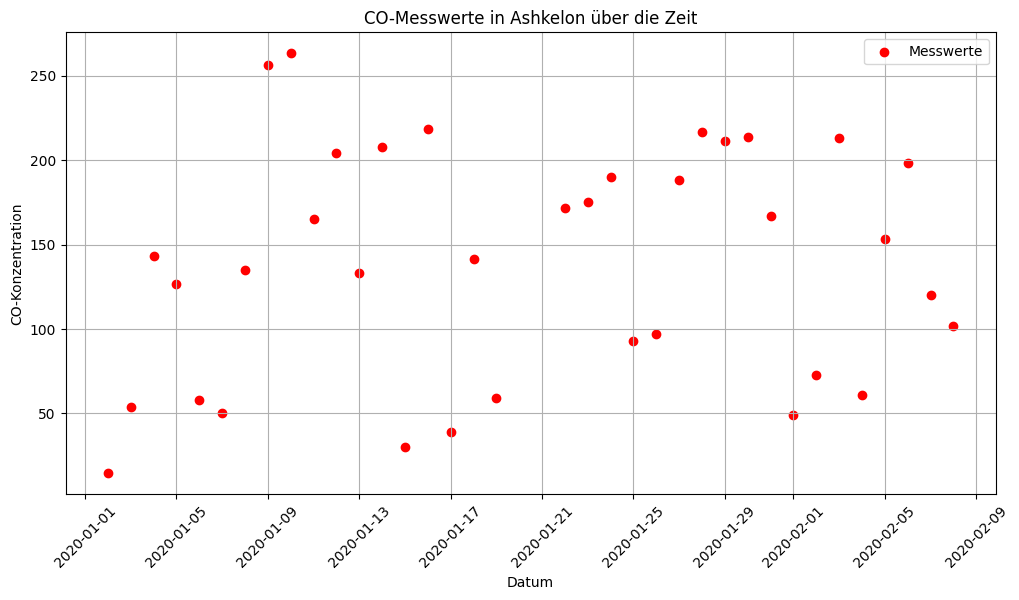

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.scatter(df_ashkelon_co["Date"], df_ashkelon_co["Co"], color="red", label="Messwerte")

plt.xlabel("Datum")
plt.ylabel("CO-Konzentration")
plt.title("CO-Messwerte in Ashkelon über die Zeit")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()



In [15]:
df_ashkelon_co_valid = df_ashkelon_co[df_ashkelon_co["Co"].notna()]
len(df_ashkelon_co_valid)

36

In [14]:
print(df_ashkelon_co_valid)

             Date     Co
613955 2020-01-02  14.50
614628 2020-01-03  54.00
615307 2020-01-04 143.40
615987 2020-01-05 126.70
616666 2020-01-06  58.00
617339 2020-01-07  50.00
618011 2020-01-08 135.00
618683 2020-01-09 256.70
619354 2020-01-10 263.40
620026 2020-01-11 165.00
620697 2020-01-12 204.00
621369 2020-01-13 133.40
622041 2020-01-14 208.00
622713 2020-01-15  30.00
623386 2020-01-16 218.70
624060 2020-01-17  38.90
624734 2020-01-18 141.70
625408 2020-01-19  59.00
627392 2020-01-22 171.70
628065 2020-01-23 175.00
628739 2020-01-24 190.00
629412 2020-01-25  93.00
630085 2020-01-26  97.00
630759 2020-01-27 188.40
631423 2020-01-28 216.70
632087 2020-01-29 211.40
632755 2020-01-30 214.00
633429 2020-01-31 166.70
634106 2020-02-01  48.90
634786 2020-02-02  73.00
635466 2020-02-03 213.40
636146 2020-02-04  61.00
636827 2020-02-05 153.40
637511 2020-02-06 198.40
638195 2020-02-07 120.00
638874 2020-02-08 101.70


Hinweis zu Ashkelon:
Bei der Stadt Ashkelon liegen lediglich Messwerte für Januar und Februar 2020 vor. Die Werte zeigen starke tägliche Schwankungen sowie ungewöhnlich hohe Konzentrationen von Kohlenmonoxid (CO), die sich deutlich von allen anderen Städten im Datensatz unterscheiden. Da keine weiteren Daten für spätere Monate vorliegen und die vorhandenen Werte stark variieren, ist anzunehmen, dass es sich um fehlerhafte oder unvollständige Messdaten handelt – möglicherweise aufgrund eines defekten Messgeräts. Ashkelon wurde daher aus der bereinigten Analyse ausgeschlossen.